In [ ]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keyword, max_images=50):
  return L(DDGS().images(keyword, max_results=max_images)).itemgot('image')

In [ ]:
url = search_images('Single Diabetic Retina', max_images=1)
url[0]

'https://www.raleighop.com/wp-content/uploads/Diabetic-Retina.jpg'

In [ ]:
from fastdownload import download_url
dest = 'diabetic_retina.jpg'
download_url(url[0], dest)

Path('diabetic_retina.jpg')

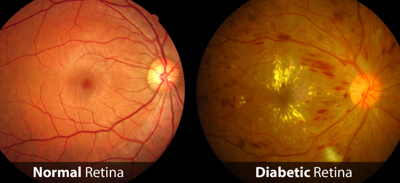

In [ ]:
from fastai.vision.all import *

img = Image.open(dest)
img.to_thumb(400, 400)

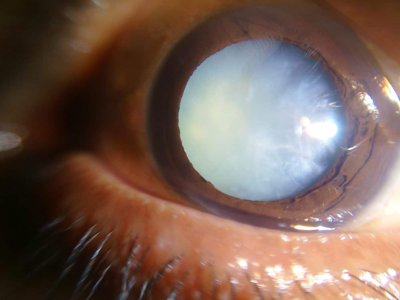

In [ ]:
download_url(search_images('Cataract Retina Images', max_images=1)[0], dest='cataract_retina.jpg')
img_cat = Image.open('cataract_retina.jpg')
img_cat.to_thumb(400, 400)

In [ ]:
diseases = ["Diabetic", "Cataract", "Glaucoma", "Hypertension"]
path = Path('ocular_disease')

from time import sleep

for i in diseases:
  dest=path/i
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{i} Retina photos'))
  sleep(15)
  resize_images(path=path/i, max_size=400, dest=path/i)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, seed=69),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

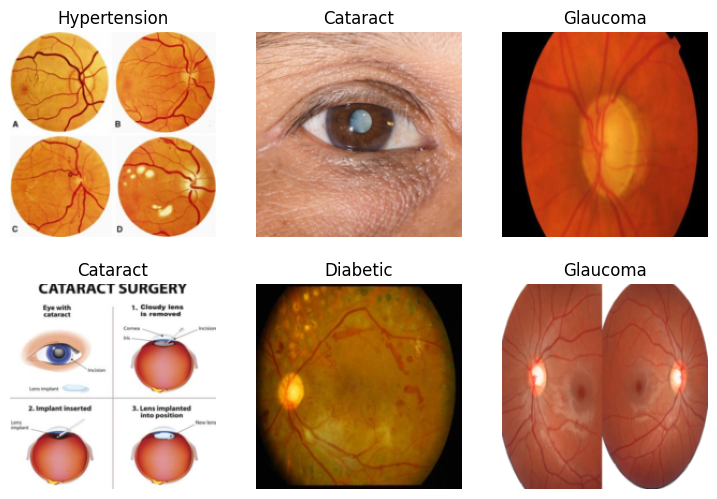

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 54.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.563962,2.156016,0.806452,00:17


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.537781,1.806096,0.741935,00:24
1,1.225749,1.722603,0.483871,00:25
2,0.978553,1.759708,0.516129,00:24


In [ ]:
disease, _, prob = learn.predict(PILImage.create('diabetic_retina.jpg'))
print(f"You have: {disease}")
print(f"Probability: {prob[1]}")

You have: Diabetic
Probability: 0.8867412805557251


In [ ]:
disease, _, prob = learn.predict(PILImage.create('cataract_retina.jpg'))
print(f"You have: {disease}")
print(f"Probability: {prob[0]}")

You have: Cataract
Probability: 0.9785267114639282
